In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv


In [2]:
# Load dataset
dataset = pd.read_csv('/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv')


from sklearn.model_selection import train_test_split

# Split into training and test data (75/25)
train_X, test_X, train_y, test_y = train_test_split(dataset.drop('quality', axis=1), dataset['quality'])


In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

gb_param = {'learning_rate': [0.05, 0.1, 0.15], 
            'n_estimators': [50, 100, 150]}

gb_grid = GridSearchCV(GradientBoostingClassifier(), gb_param)

gb_grid.fit(train_X, train_y)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.05, 0.1, 0.15],
                         'n_estimators': [50, 100, 150]})

In [4]:
gb_results = pd.DataFrame(gb_grid.cv_results_)
gb_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.765184,0.013336,0.003754,0.000044,0.05,50,"{'learning_rate': 0.05, 'n_estimators': 50}",0.629167,0.645833,0.604167,0.550000,0.619247,0.609683,0.032773,8
1,1.510462,0.006448,0.004861,0.000066,0.05,100,"{'learning_rate': 0.05, 'n_estimators': 100}",0.633333,0.637500,0.579167,0.575000,0.606695,0.606339,0.026155,9
2,2.264960,0.008974,0.006103,0.000162,0.05,150,"{'learning_rate': 0.05, 'n_estimators': 150}",0.645833,0.654167,0.587500,0.579167,0.606695,0.614672,0.030310,6
3,0.767624,0.015624,0.003623,0.000054,0.1,50,"{'learning_rate': 0.1, 'n_estimators': 50}",0.658333,0.637500,0.575000,0.579167,0.602510,0.610502,0.032628,7
4,1.506898,0.006654,0.004810,0.000079,0.1,100,"{'learning_rate': 0.1, 'n_estimators': 100}",0.641667,0.641667,0.595833,0.600000,0.627615,0.621356,0.019858,3
5,2.268805,0.010557,0.005987,0.000083,0.1,150,"{'learning_rate': 0.1, 'n_estimators': 150}",0.658333,0.608333,0.620833,0.620833,0.644351,0.630537,0.018137,2
6,0.753912,0.001954,0.003631,0.000095,0.15,50,"{'learning_rate': 0.15, 'n_estimators': 50}",0.654167,0.625000,0.587500,0.595833,0.610879,0.614676,0.023555,5
7,1.516934,0.019194,0.005181,0.000757,0.15,100,"{'learning_rate': 0.15, 'n_estimators': 100}",0.637500,0.629167,0.579167,0.604167,0.644351,0.618870,0.024062,4
8,2.260840,0.008132,0.005988,0.000063,0.15,150,"{'learning_rate': 0.15, 'n_estimators': 150}",0.675000,0.637500,0.608333,0.604167,0.648536,0.634707,0.026271,1


In [5]:
gb_results['param_learning_rate']

0    0.05
1    0.05
2    0.05
3     0.1
4     0.1
5     0.1
6    0.15
7    0.15
8    0.15
Name: param_learning_rate, dtype: object

In [6]:
gb_results['mean_test_score']

0    0.609683
1    0.606339
2    0.614672
3    0.610502
4    0.621356
5    0.630537
6    0.614676
7    0.618870
8    0.634707
Name: mean_test_score, dtype: float64

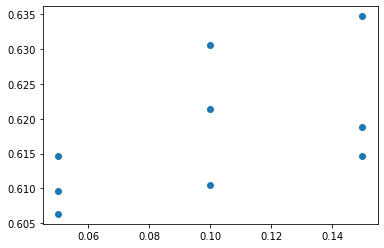

In [7]:
import matplotlib.pyplot as plt

plt.scatter(gb_results['param_learning_rate'], gb_results['mean_test_score'])

In [8]:
mean_results = np.array_split(gb_results['mean_test_score'], 3)
mean_results_averaged = np.average(mean_results, axis=1)

x_values = np.average(np.array_split(gb_results['param_learning_rate'],3), axis=1)
x_values

array([0.05000000000000001, 0.10000000000000002, 0.15], dtype=object)

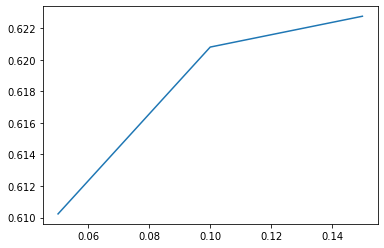

In [9]:
plt.plot(x_values, mean_results_averaged)